<h4> National Family Health Survey 2019-21 Dataset Analysis</h4>

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('datafile.csv')
pd.set_option('display.max_columns', None)
data.head()

,States/UTs,Area,Number of Households surveyed,Number of Women age 15-49 years interviewed,Number of Men age 15-54 years interviewed,Female population age 6 years and above who ever attended school (%),Population below age 15 years (%),"Sex ratio of the total population (females per 1,000 males)","Sex ratio at birth for children born in the last five years (females per 1,000 males)",Children under age 5 years whose birth was registered with the civil authority (%),Deaths in the last 3 years registered with the civil authority (%),Population living in households with electricity (%),Population living in households with an improved drinking-water source1 (%),Population living in households that use an improved sanitation facility2 (%),Households using clean fuel for cooking3 (%),Households using iodized salt (%),Households with any usual member covered under a health insurance/financing scheme (%),Children age 5 years who attended pre-primary school during the school year 2019-20 (%),Women (age 15-49) who are literate4 (%),Men (age 15-49) who are literate4 (%),Women (age 15-49) with 10 or more years of schooling (%),Men (age 15-49) with 10 or more years of schooling (%),Women (age 15-49) who have ever used the internet (%),Men (age 15-49) who have ever used the internet (%),Women age 20-24 years married before age 18 years (%),Men age 25-29 years married before age 21 years (%),Total Fertility Rate (number of children per woman),Women age 15-19 years who were already mothers or pregnant at the time of the survey (%),Adolescent fertility rate for women age 15-19 years5,Neonatal mortality rate (per 1000 live births),Infant mortality rate (per 1000 live births),Under-five mortality rate (per 1000 live births),Current Use of Family Planning Methods (Currently Married Women Age 15-49 years) - Any method6 (%),Current Use of Family Planning Methods (Currently Married Women Age 15-49 years) - Any modern method6 (%),Current Use of Family Planning Methods (Currently Married Women Age 15-49 years) - Female sterilization (%),Current Use of Family Planning Methods (Currently Married Women Age 15-49 years) - Male sterilization (%),Current Use of Family Planning Methods (Currently Married Women Age 15-49 years) - IUD/PPIUD (%),Current Use of Family Planning Methods (Currently Married Women Age 15-49 years) - Pill (%),Current Use of Family Planning Methods (Currently Married Women Age 15-49 years) - Condom (%),Current Use of Family Planning Methods (Currently Married Women Age 15-49 years) - Injectables (%),Total Unmet need for Family Planning (Currently Married Women Age 15-49 years)7 (%),Unmet need for spacing (Currently Married Women Age 15-49 years)7 (%),Health worker ever talked to female non-users about family planning (%),Current users ever told about side effects of current method of family planning8 (%),Mothers who had an antenatal check-up in the first trimester (for last birth in the 5 years before the survey) (%),Mothers who had at least 4 antenatal care visits (for last birth in the 5 years before the survey) (%),Mothers whose last birth was protected against neonatal tetanus (for last birth in the 5 years before the survey)9 (%),Mothers who consumed iron folic acid for 100 days or more when they were pregnant (for last birth in the 5 years before the survey) (%),Mothers who consumed iron folic acid for 180 days or more when they were pregnant (for last birth in the 5 years before the survey} (%),Registered pregnancies for which the mother received a Mother and Child Protection (MCP) card (for last birth in the 5 years before the survey) (%),Mothers who received postnatal care from a doctor/nurse/LHV/ANM/midwife/other health personnel within 2 days of delivery (for last birth in the 5 years before the survey) (%),Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.),Children born at home who were taken to a health facility for a check-up within 24 hours of

In [3]:
retain = ['States/UTs',	'Area',' Sex ratio of the total population (females per 1,000 males)','Women age 15 years and above who consume alcohol (%)','Men age 15 years and above who consume alcohol (%)',
          'Women (age 15-49 years) having a bank or savings account that they themselves use (%)','Women (age 15-49 years) having a mobile phone that they themselves use (%)',
          'Women (age 15-49 years) who worked in the last 12 months and were paid in cash (%)','All women age 15-49 years who are anaemic22 (%)', 'Men age 15-49 years who are anaemic (<13.0 g/dl)22 (%)',
          'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)','Children under 5 years who are underweight (weight-for-age)18 (%)', 'Children age 12-23 months who received most of their vaccinations in a private health facility (%)',
          'Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)', 'Infant mortality rate (per 1000 live births)','Women (age 15-49)  who have ever used the internet (%)','Men (age 15-49)  who have ever used the internet (%)',
          'Total Fertility Rate (number of children per woman)', 'Population living in households with electricity (%)', 'Population living in households with an improved drinking-water source1 (%)',	'Population living in households that use an improved sanitation facility2 (%)','Households using clean fuel for cooking3 (%)']

reduced_data = data.copy()
reduced_data= reduced_data[retain]
          
          
          

In [4]:
reduced_data.head() #Reducing the data to specific columns

,States/UTs,Area,"Sex ratio of the total population (females per 1,000 males)",Women age 15 years and above who consume alcohol (%),Men age 15 years and above who consume alcohol (%),Women (age 15-49 years) having a bank or savings account that they themselves use (%),Women (age 15-49 years) having a mobile phone that they themselves use (%),Women (age 15-49 years) who worked in the last 12 months and were paid in cash (%),All women age 15-49 years who are anaemic22 (%),Men age 15-49 years who are anaemic (<13.0 g/dl)22 (%),Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%),Children under 5 years who are underweight (weight-for-age)18 (%),Children age 12-23 months who received most of their vaccinations in a private health facility (%),Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.),Infant mortality rate (per 1000 live births),Women (age 15-49) who have ever used the internet (%),Men (age 15-49) who have ever used the internet (%),Total Fertility Rate (number of children per woman),Population living in households with electricity (%),Population living in households with an improved drinking-water source1 (%),Population living in households that use an improved sanitation facility2 (%),Households using clean fuel for cooking3 (%)
0,India,Urban,985.0,0.6,16.5,80.9,69.4,25.0,53.8,20.4,64.2,27.3,11.1,3385,26.6,51.8,72.5,1.6,99.1,98.7,81.5,89.7
1,India,Rural,1037.0,1.6,19.9,77.4,46.6,25.6,58.5,27.4,68.3,33.8,1.6,2770,38.4,24.6,48.7,2.1,95.7,94.6,64.9,43.2
2,India,Total,1020.0,1.3,18.8,78.6,54.0,25.4,57.0,25.0,67.1,32.1,4.2,2916,35.2,33.3,57.1,2.0,96.8,95.9,70.2,58.6
3,Andaman & Nicobar Islands,Urban,1023.0,0.7,33.8,88.5,80.8,34.7,57.2,9.2,47.8,15.1,(5.7),4230,*,44.1,54.6,1.4,99.5,98.0,88.0,95.6
4,Andaman & Nicobar Islands,Rural,929.0,7.6,41.9,89.8,80.9,17.1,57.6,20.4,33.3,31.1,0.0,2089,(8.4),27.9,41.1,1.2,96.5,95.3,88.0,71.0


In [5]:
changed_names = {' Sex ratio of the total population (females per 1,000 males)': 'Sex Ratio',
                 'Women age 15 years and above who consume alcohol (%)': 'Women_Alcohol_C', 'Men age 15 years and above who consume alcohol (%)': 'Men_Alcohol_C', 'Women (age 15-49 years) having a bank or savings account that they themselves use (%)': 'Women_BA', 'Women (age 15-49 years) having a mobile phone that they themselves use (%)': 'Women_Phones', 
                 'Women (age 15-49 years) who worked in the last 12 months and were paid in cash (%)': 'Women_worked', 'All women age 15-49 years who are anaemic22 (%)': 'Women_Anaemic', 'Men age 15-49 years who are anaemic (<13.0 g/dl)22 (%)': 'Men_Anaemic', 'Children age 6-59 months who are anaemic (<11.0 g/dl)22 (%)' : 'Children_Anaemic', 'Children under 5 years who are underweight (weight-for-age)18 (%)': 'Children_Underweight',
                 'Children age 12-23 months who received most of their vaccinations in a private health facility (%)' : 'Children_Vaccinated', 'Average out-of-pocket expenditure per delivery in a public health facility (for last birth in the 5 years before the survey) (Rs.)' : 'Avg_OPE_Delivery', 'Infant mortality rate (per 1000 live births)' : 'Infant_Mortality_Rate', 'Women (age 15-49)  who have ever used the internet (%)' : 'Women_internet', 'Men (age 15-49)  who have ever used the internet (%)': 'Men_Internet', 'Total Fertility Rate (number of children per woman)': 'TFR', 'Population living in households with electricity (%)': 'Pop_Electricity', 'Population living in households with an improved drinking-water source1 (%)': 'Pop_improved_water_source',  'Population living in households that use an improved sanitation facility2 (%)': 'Pop_sanitation', 'Households using clean fuel for cooking3 (%)': 'Households_clean_fuel'}

reduced_data = reduced_data.rename(columns=changed_names)

In [6]:
reduced_data.head() #Changing the names

,States/UTs,Area,Sex Ratio,Women_Alcohol_C,Men_Alcohol_C,Women_BA,Women_Phones,Women_worked,Women_Anaemic,Men_Anaemic,Children_Anaemic,Children_Underweight,Children_Vaccinated,Avg_OPE_Delivery,Infant_Mortality_Rate,Women_internet,Men_Internet,TFR,Pop_Electricity,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel
0,India,Urban,985.0,0.6,16.5,80.9,69.4,25.0,53.8,20.4,64.2,27.3,11.1,3385,26.6,51.8,72.5,1.6,99.1,98.7,81.5,89.7
1,India,Rural,1037.0,1.6,19.9,77.4,46.6,25.6,58.5,27.4,68.3,33.8,1.6,2770,38.4,24.6,48.7,2.1,95.7,94.6,64.9,43.2
2,India,Total,1020.0,1.3,18.8,78.6,54.0,25.4,57.0,25.0,67.1,32.1,4.2,2916,35.2,33.3,57.1,2.0,96.8,95.9,70.2,58.6
3,Andaman & Nicobar Islands,Urban,1023.0,0.7,33.8,88.5,80.8,34.7,57.2,9.2,47.8,15.1,(5.7),4230,*,44.1,54.6,1.4,99.5,98.0,88.0,95.6
4,Andaman & Nicobar Islands,Rural,929.0,7.6,41.9,89.8,80.9,17.1,57.6,20.4,33.3,31.1,0.0,2089,(8.4),27.9,41.1,1.2,96.5,95.3,88.0,71.0


In [7]:
def cleaner(df):
    string_cols = [col for col in df.columns if pd.api.types.is_string_dtype(df[col])]
    df[string_cols] = df[string_cols].apply(lambda x: x.str.strip('() '))
    
    mask = df[string_cols].apply(lambda x: x.str.contains(r'\*', regex=True)).any(axis=1)
    df = df[~mask].copy()
    return df

cleaned_data = cleaner(reduced_data)

In [8]:
cleaned_data.infer_objects

<bound method NDFrame.infer_objects of                     States/UTs   Area  Sex Ratio Women_Alcohol_C  \
0                        India  Urban      985.0             0.6   
1                        India  Rural     1037.0             1.6   
2                        India  Total     1020.0             1.3   
4    Andaman & Nicobar Islands  Rural      929.0             7.6   
5    Andaman & Nicobar Islands  Total      963.0             5.0   
..                         ...    ...        ...             ...   
105                Uttarakhand  Urban      943.0             0.3   
106                Uttarakhand  Rural     1052.0             0.4   
107                Uttarakhand  Total     1016.0             0.3   
108                West Bengal  Urban     1016.0             0.8   
109                West Bengal  Rural     1065.0             1.3   

    Men_Alcohol_C Women_BA Women_Phones Women_worked Women_Anaemic  \
0            16.5     80.9         69.4         25.0          53.8   
1   

In [9]:
def dtype_cleaner(df):
    excluded= ['States/UTs', 'Area', ' Sex Ratio', 'Pop_Electricity',	'Pop_improved_water_source', 'Pop_sanitation']
    for col in df.columns:
        if col not in excluded:
            df[col] = pd.to_numeric(df[col])
    return df

In [10]:
clean_data = dtype_cleaner(cleaned_data)
clean_data.head()

,States/UTs,Area,Sex Ratio,Women_Alcohol_C,Men_Alcohol_C,Women_BA,Women_Phones,Women_worked,Women_Anaemic,Men_Anaemic,Children_Anaemic,Children_Underweight,Children_Vaccinated,Avg_OPE_Delivery,Infant_Mortality_Rate,Women_internet,Men_Internet,TFR,Pop_Electricity,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel
0,India,Urban,985.0,0.6,16.5,80.9,69.4,25.0,53.8,20.4,64.2,27.3,11.1,3385.0,26.6,51.8,72.5,1.6,99.1,98.7,81.5,89.7
1,India,Rural,1037.0,1.6,19.9,77.4,46.6,25.6,58.5,27.4,68.3,33.8,1.6,2770.0,38.4,24.6,48.7,2.1,95.7,94.6,64.9,43.2
2,India,Total,1020.0,1.3,18.8,78.6,54.0,25.4,57.0,25.0,67.1,32.1,4.2,2916.0,35.2,33.3,57.1,2.0,96.8,95.9,70.2,58.6
4,Andaman & Nicobar Islands,Rural,929.0,7.6,41.9,89.8,80.9,17.1,57.6,20.4,33.3,31.1,0.0,2089.0,8.4,27.9,41.1,1.2,96.5,95.3,88.0,71.0
5,Andaman & Nicobar Islands,Total,963.0,5.0,39.1,89.2,80.8,24.6,57.5,16.1,40.0,23.7,3.2,2924.0,20.6,34.8,46.5,1.3,97.6,96.3,88.0,79.8


In [11]:
clean_data.isnull().sum()

States/UTs                   0
Area                         0
Sex Ratio                    0
Women_Alcohol_C              0
Men_Alcohol_C                0
Women_BA                     0
Women_Phones                 0
Women_worked                 0
Women_Anaemic                0
Men_Anaemic                  0
Children_Anaemic             0
Children_Underweight         0
Children_Vaccinated          0
Avg_OPE_Delivery             0
Infant_Mortality_Rate        0
Women_internet               0
Men_Internet                 0
TFR                          0
Pop_Electricity              0
Pop_improved_water_source    0
Pop_sanitation               0
Households_clean_fuel        0
dtype: int64

Q.1 Analysing the correlations of different numeric columns to each other, which will be useful in later questions. 

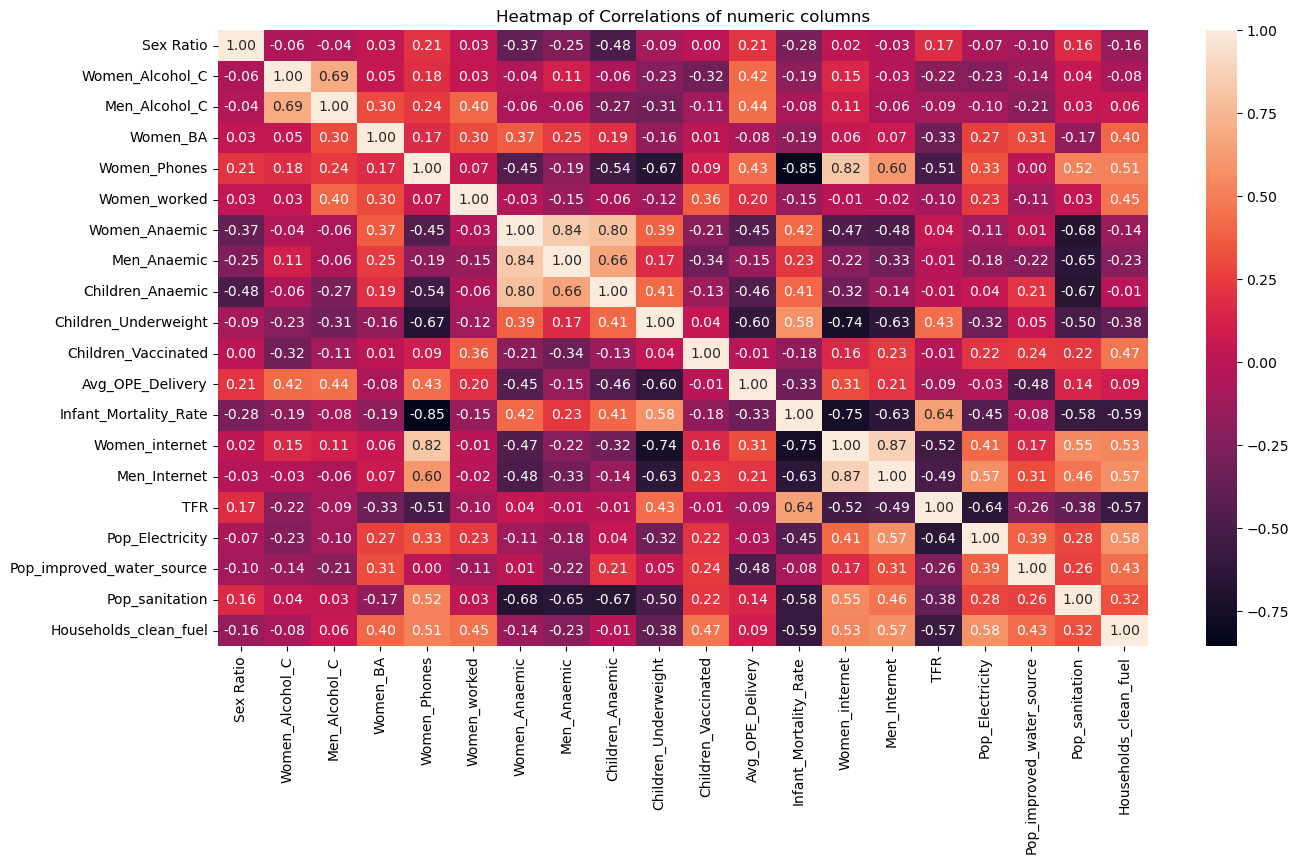

In [12]:
total_data= clean_data[clean_data['Area']== 'Total']
numeric_df = total_data.select_dtypes(include= ['number'])
corr_data = numeric_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_data, annot=True, fmt='.2f')
plt.title('Heatmap of Correlations of numeric columns')
plt.show()

Women_Phones vs. Men_Internet: The correlation is 0.85, which is very strong. This suggests that the areas where women have higher phone ownership are also the areas where men have higher internet access.

TFR (Total Fertility Rate) vs. Women_BA (Bank Account): The correlation is −0.33. Higher female access to Bank account is moderately associated with a lower fertility rate, giving us insight about more stronger societal taboos and practices influences on women's healthcare than just little of economic freedom.

Sex Ratio has very weak correlations (close to zero) with most other variables, indicating that the sex ratio is largely independent of these socioeconomic and health indicators.

Women_Worked vs. Women_BA: The correlation is 0.30. Women with a holding of her account in the Bank are moderately more likely to be working.

Higher rates of children's vaccination are not very strongly linked to lower infant mortality.

Areas with higher internet access (for both men and women) show significantly lower infant mortality rates, suggesting a link between access to information/modernity and better health outcomes.

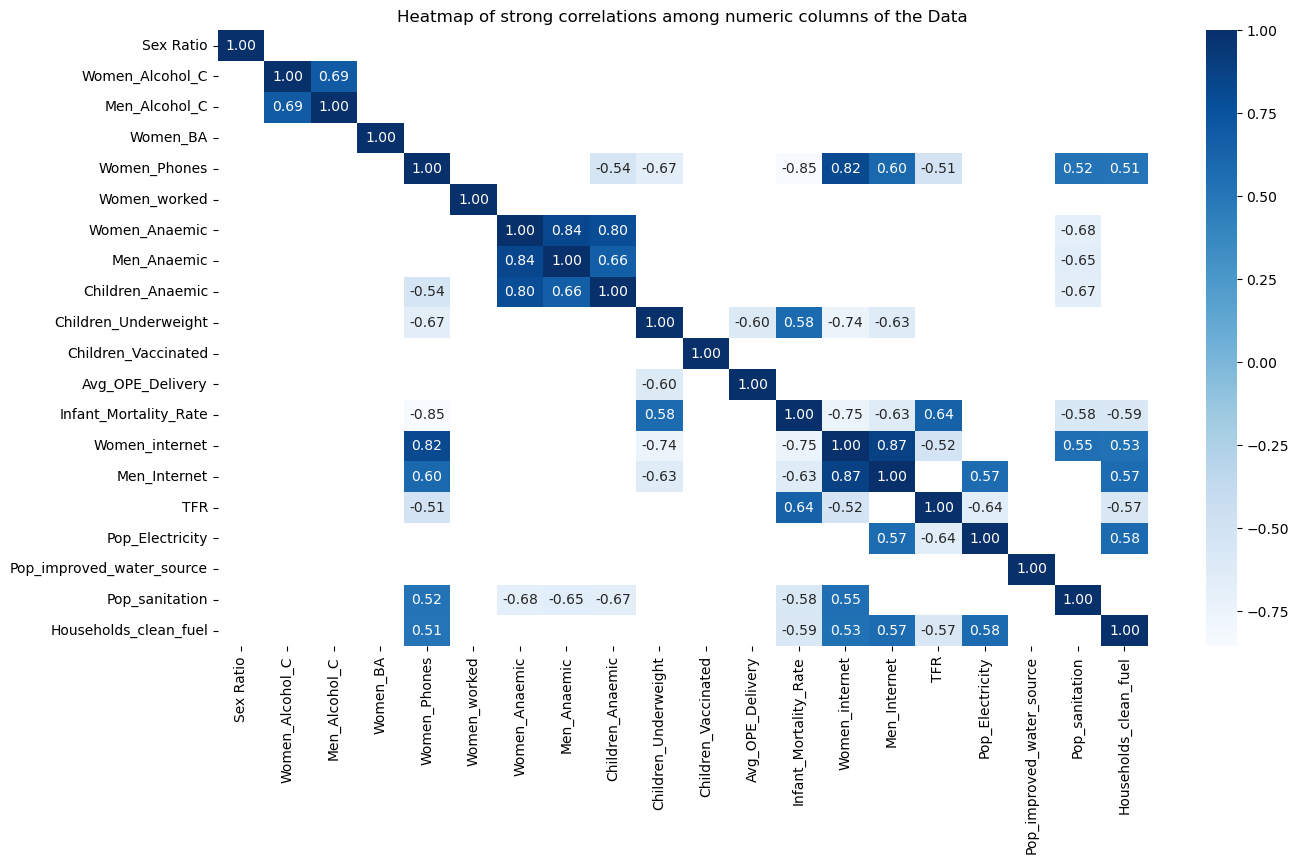

In [13]:
selected_corr = corr_data[(corr_data > 0.5) | (corr_data < -0.5)]
plt.figure(figsize=(15,8))
sns.heatmap(selected_corr, cmap='Blues',annot=True, fmt='.2f')
plt.title('Heatmap of strong correlations among numeric columns of the Data')
plt.show()

Strong Link in Health: Anaemia in women and men is highly correlated, suggesting environmental or nutritional deficiencies that affect the entire population are the primary drivers.

Population households living in Electricity has a good correlation with Households clean fuel access, and this can makes up infer about the linkage of basic amenities for a household.

Gendered Alcohol Use: While not ≥0.70, the high correlation suggests that the prevalence of alcohol consumption is similar across genders within the observed regions.

Anaemic and pop sanitation:  Improved sanitation is strongly associated with a decrease in the rate of anaemic across ages and gender, emphasizing the role of hygiene in the health.

Infant Mortality Rate, TFR have a negative strong correlation with the Households clean fuel consumption, suggesting the awareness of women's and child's health with the coming of healthier amenitites in the households.

Q.2 What is the performance of high sex ratio States/UTs in other parameters that are specifically  related to the women?

In [14]:
total_data = clean_data[clean_data['Area'] == 'Total']
high_sex_ratio = total_data.sort_values('Sex Ratio', ascending= False).head()
high_sex_ratio

,States/UTs,Area,Sex Ratio,Women_Alcohol_C,Men_Alcohol_C,Women_BA,Women_Phones,Women_worked,Women_Anaemic,Men_Anaemic,Children_Anaemic,Children_Underweight,Children_Vaccinated,Avg_OPE_Delivery,Infant_Mortality_Rate,Women_internet,Men_Internet,TFR,Pop_Electricity,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel
56,Lakshadweep,Total,1187.0,0.3,0.4,66.9,84.0,10.9,25.8,5.6,43.1,25.8,0.0,2533.0,0.0,56.4,80.3,1.4,99.8,92.9,99.8,59.4
50,Kerala,Total,1121.0,0.2,19.9,78.5,86.6,25.8,36.3,17.8,39.4,19.7,12.3,6710.0,4.4,61.1,76.1,1.8,99.6,94.9,98.7,72.1
83,Puducherry,Total,1112.0,0.3,27.7,92.6,82.9,38.2,55.1,19.5,64.0,15.3,2.6,3259.0,2.9,61.9,80.7,1.5,99.9,99.9,84.9,92.3
17,Bihar,Total,1090.0,0.4,15.5,76.7,51.4,12.6,63.5,29.5,69.4,41.0,2.2,2848.0,46.8,20.6,43.6,3.0,96.3,99.2,49.4,37.8
95,Tamil Nadu,Total,1088.0,0.3,25.4,92.2,74.6,40.8,53.4,15.2,57.4,22.0,10.1,3316.0,18.6,46.9,70.2,1.8,99.3,98.6,72.6,82.9


In [15]:
women_data = high_sex_ratio.loc[:, high_sex_ratio.columns.str.contains('Women') | (high_sex_ratio.columns == 'TFR') | (high_sex_ratio.columns == 'States/UTs') ]
melted_data = women_data.melt(id_vars=['States/UTs'], var_name='Metric', value_name='Value') #Extracting only specific columns and making a dataframe of theirs.

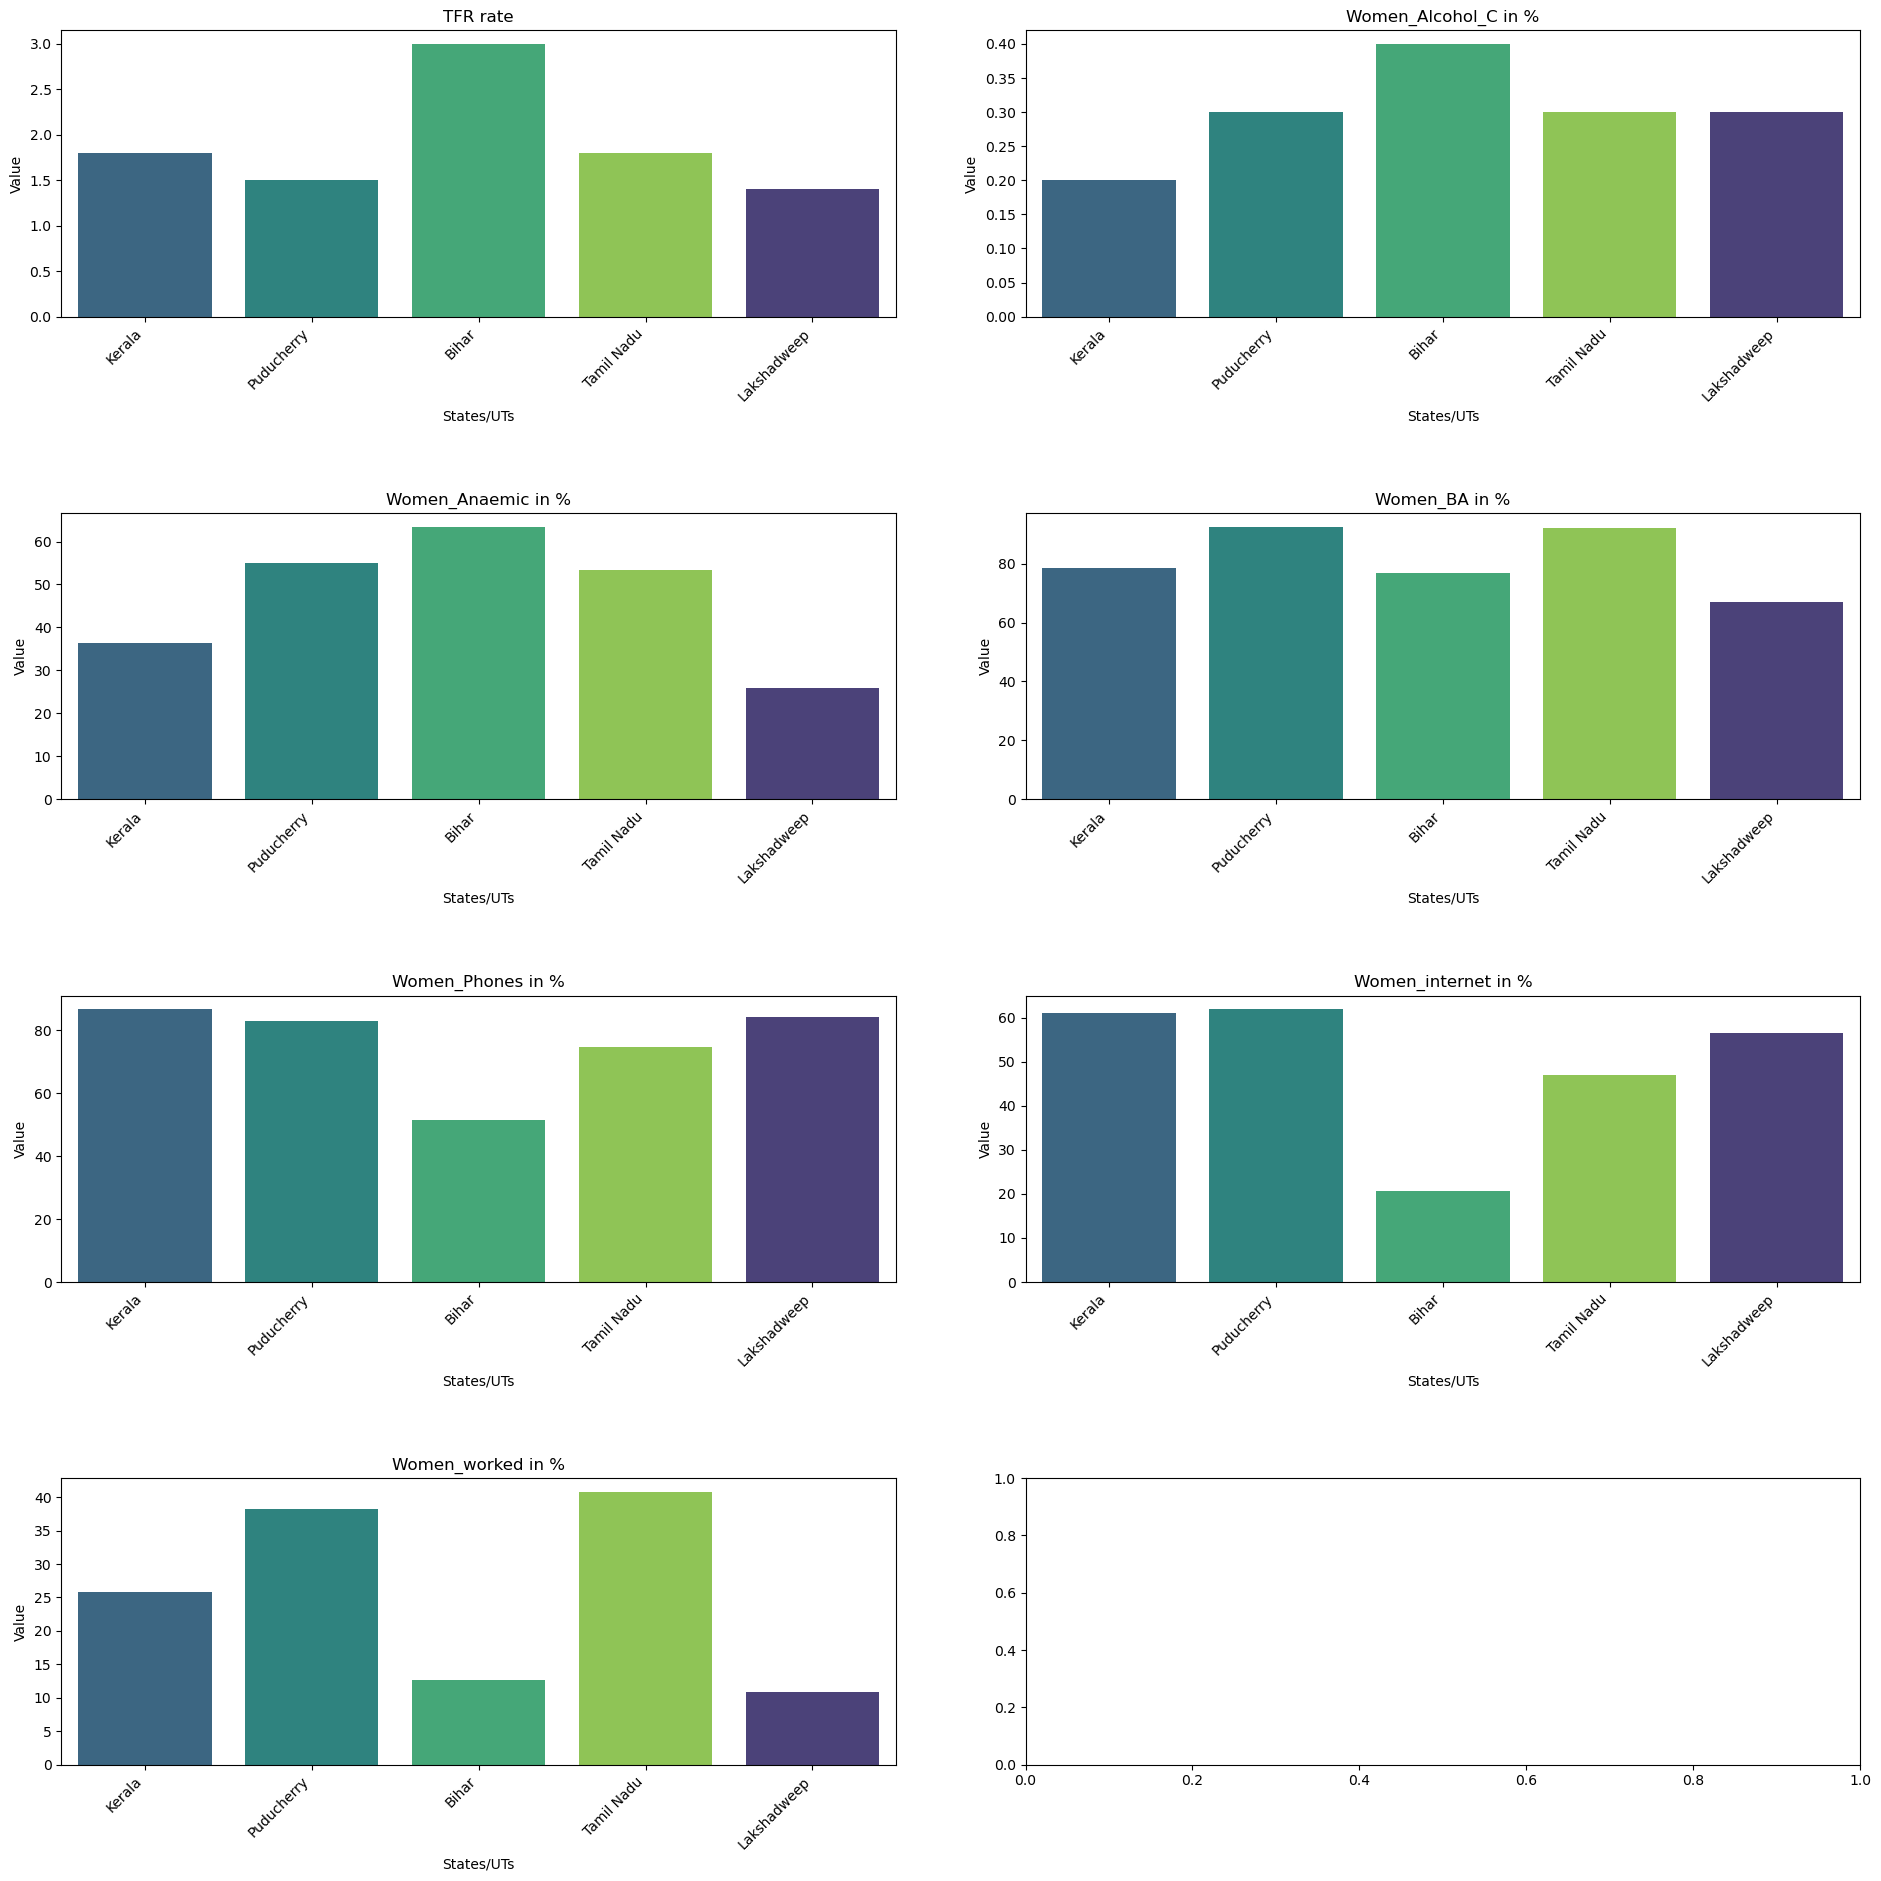

In [16]:
metrics = Series(sorted(melted_data['Metric'].unique())) #Finding unique metrics
fig, axes = plt.subplots(nrows= 4, ncols= 2, sharex = False, figsize=(20, 20))
state_order = ['Kerala', 'Puducherry', 'Bihar', 'Tamil Nadu', 'Lakshadweep']
axes = axes.flatten()
for i, metric in enumerate(metrics):
    plot_data = melted_data[melted_data['Metric'] == metric] #converting each metric into a dataframe of its own
    sns.barplot(
        x='States/UTs', y='Value', data=plot_data, ax=axes[i], hue= 'States/UTs',  legend= False, palette='viridis', order=state_order)
    if metric != 'TFR':
      axes[i].set_title(f'{metric} in %') #Correcting the name of the title in each metric
    else:
      axes[i].set_title(f'{metric} rate')
    
    axes[i].tick_params(axis='x', rotation=45) 
    num_states = len(state_order)
    
    axes[i].set_xticks(np.arange(num_states))
    

    axes[i].set_xticklabels(state_order, rotation=45, ha='right')
    labels = axes[i].get_xticklabels()
    axes[i].set_xticklabels(labels, ha='right')  
    
plt.tight_layout(pad=5.0)
plt.show()

We find that even though Bihar has a strong sex ratio but higher sex ratio is not a proven guarantee of improved women conditions as can be seen in these paraameters. Tamil Nadu has a higher percentage of women worked but also relativeky in anaemia. Lakshawadeep has low levels of women opening their bank accounts and this might be due to geography and less urbanization of the region. Most of the parameters are very less correlated to each other. Kerala roughly stand out in terms of relatively better conditions for the women.

In [17]:
clean_data.head(2)

,States/UTs,Area,Sex Ratio,Women_Alcohol_C,Men_Alcohol_C,Women_BA,Women_Phones,Women_worked,Women_Anaemic,Men_Anaemic,Children_Anaemic,Children_Underweight,Children_Vaccinated,Avg_OPE_Delivery,Infant_Mortality_Rate,Women_internet,Men_Internet,TFR,Pop_Electricity,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel
0,India,Urban,985.0,0.6,16.5,80.9,69.4,25.0,53.8,20.4,64.2,27.3,11.1,3385.0,26.6,51.8,72.5,1.6,99.1,98.7,81.5,89.7
1,India,Rural,1037.0,1.6,19.9,77.4,46.6,25.6,58.5,27.4,68.3,33.8,1.6,2770.0,38.4,24.6,48.7,2.1,95.7,94.6,64.9,43.2


Q.3 Analysing the rural population metrics with regards to children and women healthcare.

In [18]:
rural_data = clean_data[clean_data['Area'] == 'Rural']

rural_children_data = rural_data.loc[:, rural_data.columns.isin(['States/UTs', 'Infant_Mortality_Rate', 'Avg_OPE_Delivery', 'TFR']) | (rural_data.columns.str.contains('Ch'))]
rural_children_data.head()

,States/UTs,Children_Anaemic,Children_Underweight,Children_Vaccinated,Avg_OPE_Delivery,Infant_Mortality_Rate,TFR
1,India,68.3,33.8,1.6,2770.0,38.4,2.1
4,Andaman & Nicobar Islands,33.3,31.1,0.0,2089.0,8.4,1.2
7,Andhra Pradesh,65.0,31.4,1.3,3248.0,30.4,1.8
10,Arunachal Pradesh,57.1,15.8,0.7,9649.0,12.3,1.9
13,Assam,68.6,33.6,1.3,5269.0,33.1,1.9


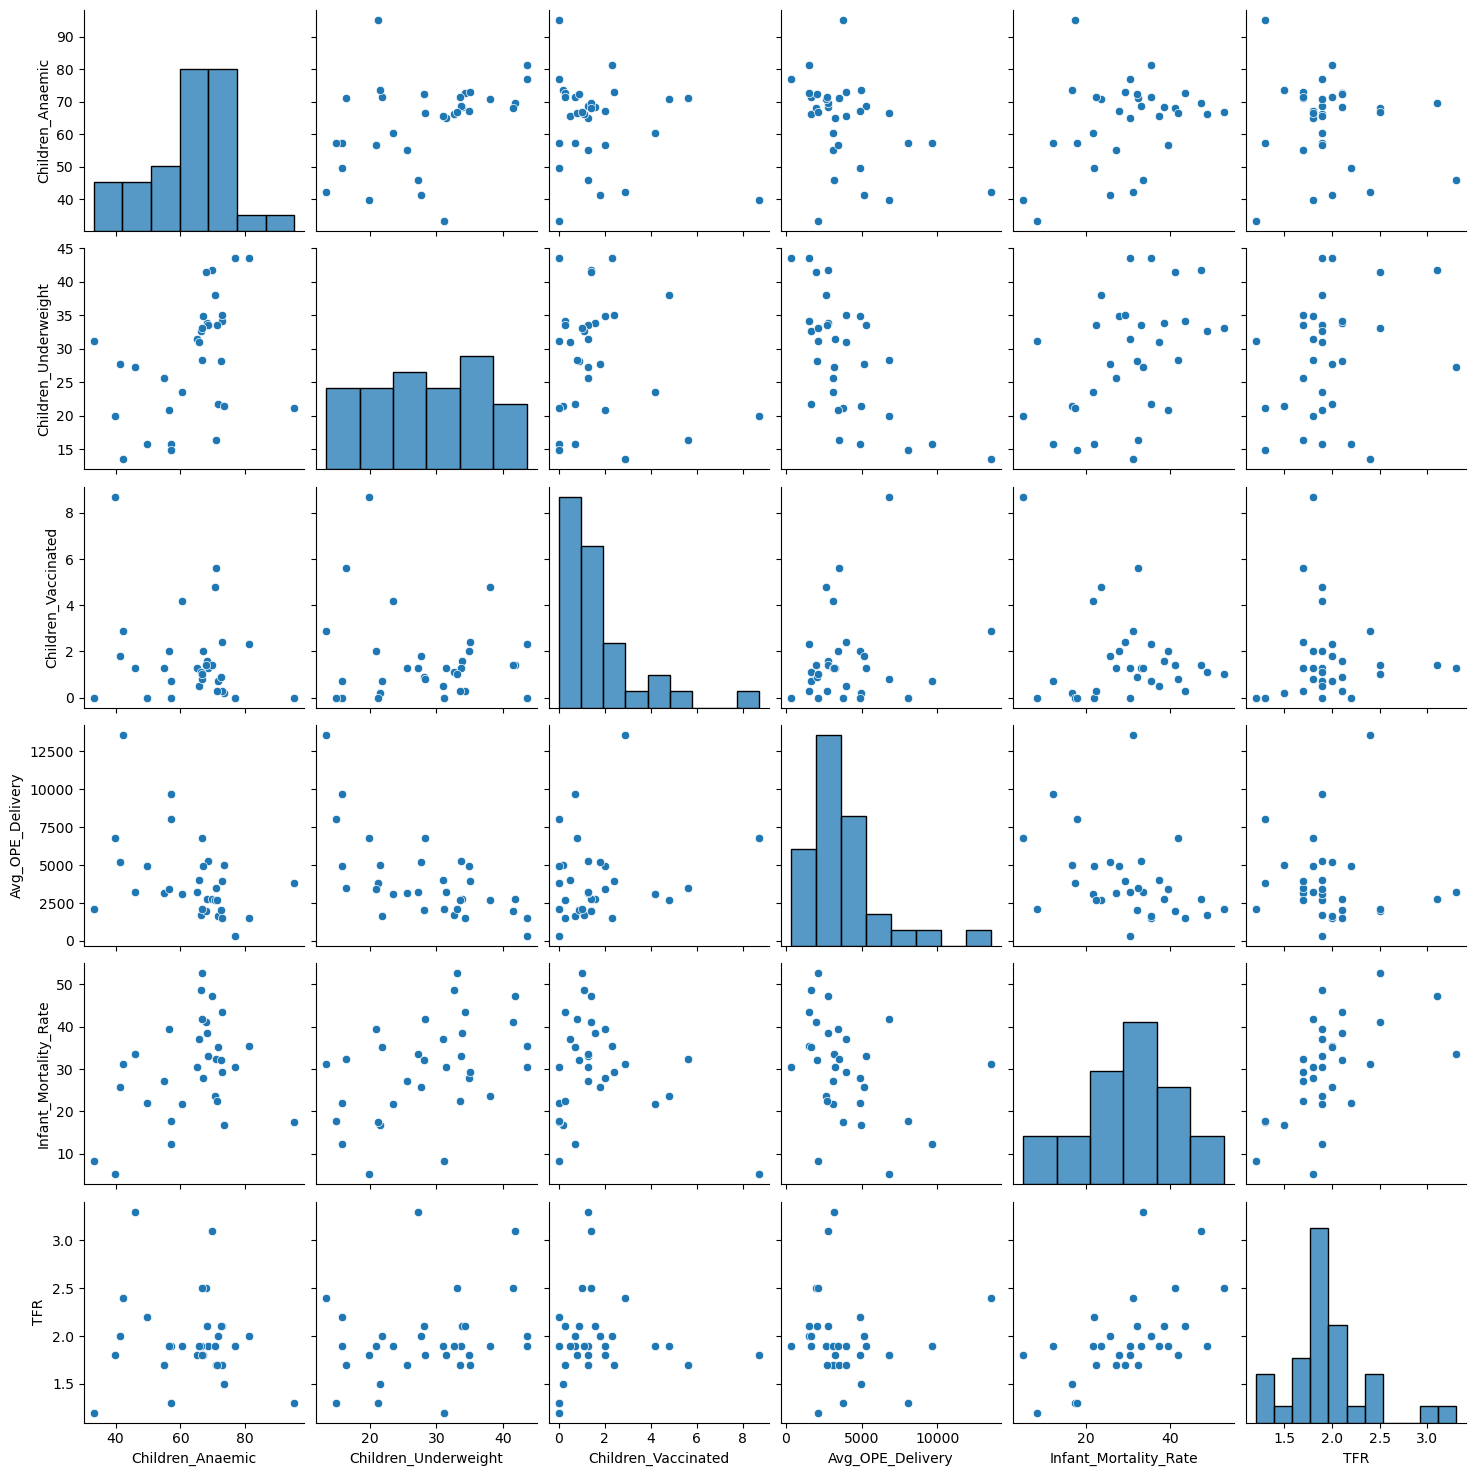

In [19]:
numeric_columns = rural_children_data.select_dtypes(include=['number'])

sns.pairplot(numeric_columns)
plt.show()

We find that children underweight and avg out of pocket expenditure in delivery has kind of negative correlation in rural population and this also confirms in our total heatmap correlation(0.60).
Higher TFR with high IMR has also a strong positive correltaion as in our heatmap.  Rest parameters are not significantly resulting into stronger correlations and there are other factors that are influencing children's healthcare in rural population. 

Q.4 How the rural population is performing in Children Anaemic and underweight levels in each state?

In [20]:
high_IMR= rural_children_data.sort_values('Infant_Mortality_Rate', ascending = False)
top_5_rural= high_IMR.head()
top_5_rural #sorting the rural population with high infant mortality rate

,States/UTs,Children_Anaemic,Children_Underweight,Children_Vaccinated,Avg_OPE_Delivery,Infant_Mortality_Rate,TFR
103,Uttar Pradesh,66.7,33.1,1.0,2117.0,52.6,2.5
22,Chhattisgarh,66.2,32.7,1.1,1682.0,48.7,1.9
16,Bihar,69.7,41.8,1.4,2771.0,47.3,3.1
58,Madhya Pradesh,72.7,34.2,0.3,1523.0,43.5,2.1
100,Tripura,66.5,28.3,0.8,6774.0,41.8,1.8


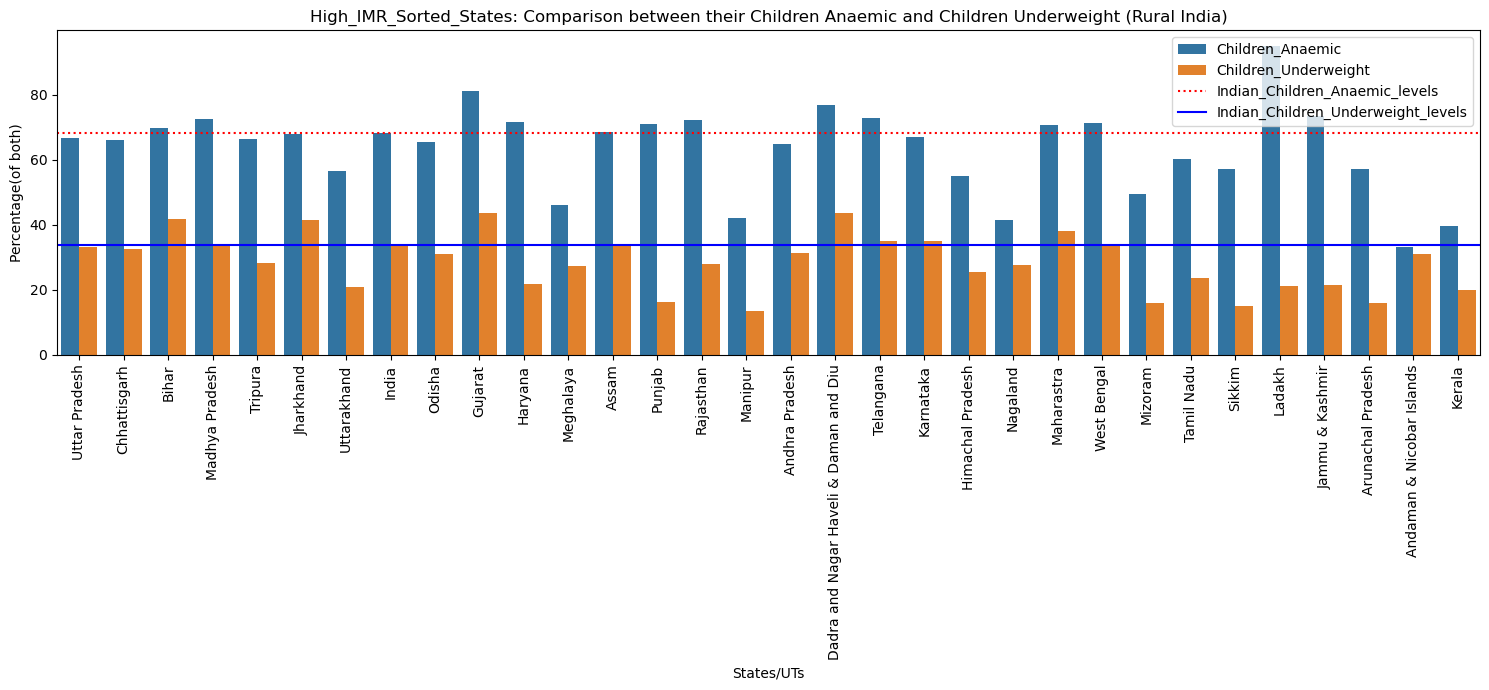

In [21]:
melted_df = high_IMR.melt(id_vars= ['States/UTs'], value_vars= ['Children_Anaemic', 'Children_Underweight'],
              var_name='Condition',
    value_name='Percentage') #Creating the dataframe of the metrics, here 2

India_rural_CA = high_IMR[high_IMR['States/UTs'] == 'India']['Children_Anaemic'].iloc[0] #Extracting the Indian averages on these metrics
India_rural_CU = high_IMR[high_IMR['States/UTs'] == 'India']['Children_Underweight'].iloc[0]
states_list = melted_df['States/UTs'].unique().tolist()
fig, ax = plt.subplots(figsize= (15,7))
sns.barplot(x= 'States/UTs', y= 'Percentage', hue= 'Condition', ax= ax, data= melted_df) 

ax.set_title('High_IMR_Sorted_States: Comparison between their Children Anaemic and Children Underweight (Rural India)')
ax.set_ylabel('Percentage(of both)')
ax.set_xticks(range(len(states_list)))
ax.set_xticklabels(states_list, rotation = 90)
ax.axhline(y= India_rural_CA, label ='Indian_Children_Anaemic_levels', color= 'red', linestyle =':')
ax.axhline(y= India_rural_CU, label ='Indian_Children_Underweight_levels', color= 'blue',linestyle ='-' )
ax.legend(loc = 'upper right')
plt.tight_layout()
plt.show()


We find that India is having high children anaemic levels, and majority of the states has more than 50% of the surveyed children population facing anaemia. Only some North Eastern states and Kerala have comparitively lower children anaemia levels. However we do se that both these parameters are not very correlated to each other. We find states like Sikkim who have a very high children anaemic levels but low children underweight. Also we find Ladakh with very high anameic levels and serious consideration should be taken into this respect given the region's cool desert type of climate and low socio-economic development.  

#NCT of Delhi, Andaman & Nicobar Islands, Himachal Pradesh, Ladakh, Sikkim,  Puducherry -- States that are removed in the upcoming analysis as they don't have both the data of rural and urban population which will be useful in the comparison.

Q.5 Compare the Average Out of the Pocket Expenditure in delivery with regards to rural and urban population.

In [22]:
copied_data = clean_data.copy()
dropped_states = ['NCT of Delhi','Andaman & Nicobar Islands', 'Himachal Pradesh', 'Ladakh', 'Sikkim',  'Puducherry']
copied_data = copied_data[~copied_data['States/UTs'].isin(dropped_states)]
copied_data.head()

,States/UTs,Area,Sex Ratio,Women_Alcohol_C,Men_Alcohol_C,Women_BA,Women_Phones,Women_worked,Women_Anaemic,Men_Anaemic,Children_Anaemic,Children_Underweight,Children_Vaccinated,Avg_OPE_Delivery,Infant_Mortality_Rate,Women_internet,Men_Internet,TFR,Pop_Electricity,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel
0,India,Urban,985.0,0.6,16.5,80.9,69.4,25.0,53.8,20.4,64.2,27.3,11.1,3385.0,26.6,51.8,72.5,1.6,99.1,98.7,81.5,89.7
1,India,Rural,1037.0,1.6,19.9,77.4,46.6,25.6,58.5,27.4,68.3,33.8,1.6,2770.0,38.4,24.6,48.7,2.1,95.7,94.6,64.9,43.2
2,India,Total,1020.0,1.3,18.8,78.6,54.0,25.4,57.0,25.0,67.1,32.1,4.2,2916.0,35.2,33.3,57.1,2.0,96.8,95.9,70.2,58.6
6,Andhra Pradesh,Urban,1024.0,0.3,20.5,86.7,67.4,36.5,57.8,13.8,58.7,25.1,11.5,2659.0,29.8,33.9,65.1,1.5,99.6,99.4,89.1,96.6
7,Andhra Pradesh,Rural,1055.0,0.6,24.5,79.6,40.9,44.5,59.3,17.3,65.0,31.4,1.3,3248.0,30.4,15.4,41.5,1.8,99.4,95.4,72.1,77.9


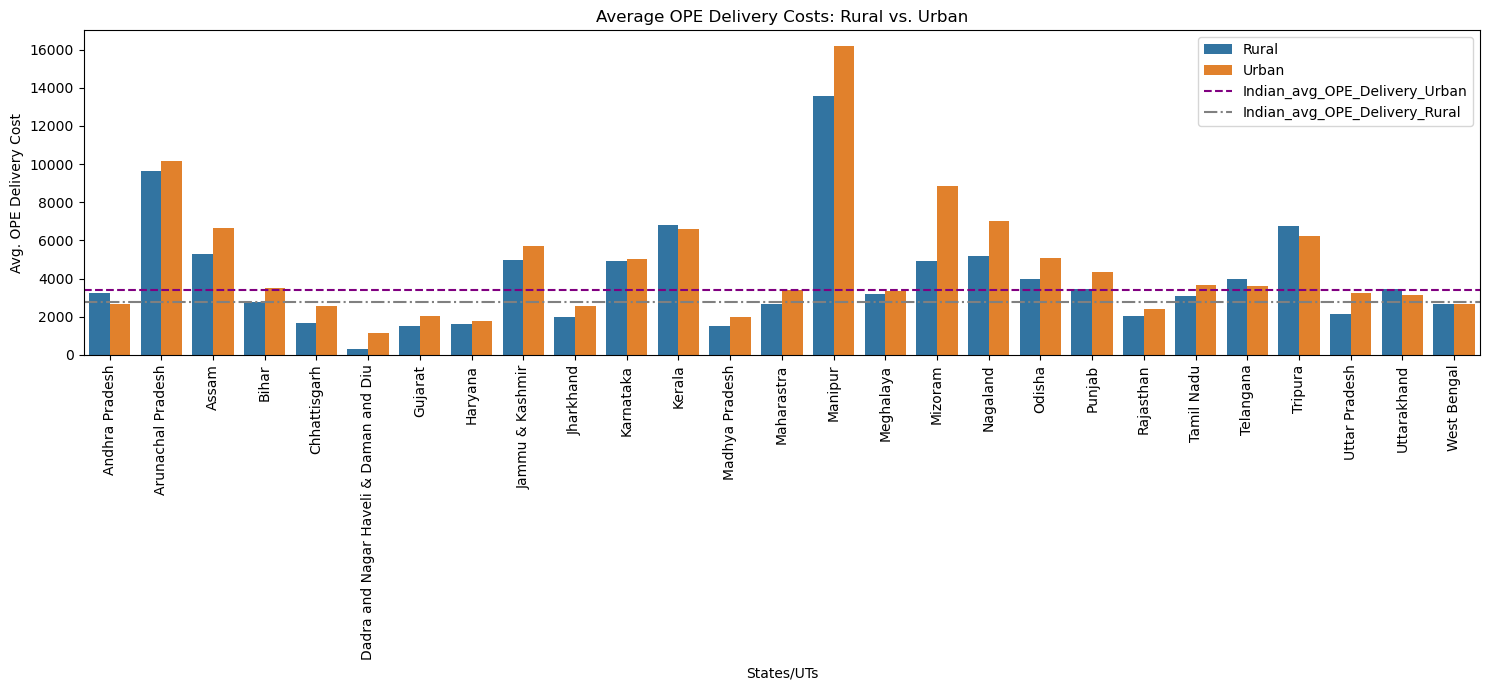

In [23]:
rural_data = copied_data[(copied_data['Area'] == 'Rural') & (copied_data['States/UTs'] != 'India')] #Removing the India in the x axis data
urban_data = copied_data[(copied_data['Area'] == 'Urban') & (copied_data['States/UTs'] != 'India')]

ind_urban = copied_data[(copied_data['States/UTs'] == 'India') & (copied_data['Area'] == 'Urban')]['Avg_OPE_Delivery'].iloc[0] #Measuring the avg India level
ind_rural = copied_data[(copied_data['States/UTs'] == 'India') & (copied_data['Area'] == 'Rural')]['Avg_OPE_Delivery'].iloc[0]

states_list = urban_data['States/UTs'].tolist()
combined_data = pd.concat([rural_data, urban_data]).reset_index(drop= True)
sorted_data= combined_data.sort_values('States/UTs', ascending = True)

fig, ax = plt.subplots(figsize = (15,7))
sns.barplot(
    x='States/UTs',
    y='Avg_OPE_Delivery',
    hue='Area',  
    data=sorted_data,
    ax=ax
)
ax.set_title('Average OPE Delivery Costs: Rural vs. Urban')
ax.set_ylabel('Avg. OPE Delivery Cost')
ax.set_xticks(range(len(states_list)))
ax.set_xticklabels(states_list, rotation = 90)
ax.axhline(y= ind_urban, label ='Indian_avg_OPE_Delivery_Urban', color= 'purple', linestyle ='--')
ax.axhline(y= ind_rural, label ='Indian_avg_OPE_Delivery_Rural', color= 'grey',linestyle ='-.' )
ax.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

On average across India, the cost of delivery is higher in urban areas than in rural areas. This is likely due to better access to and utilization of private healthcare facilities, which often charge more, in urban centers. Manipur shows the high expenditure. The extremely high urban cost may point to a small number of very expensive private facilities driving up the average or a localized issue in urban healthcare pricing. Some states has similar rural and urban costs as specific as in West Bengal and this might be due to state intervened Heathcare in the urban cities that lowers the prices.

Q.6 Extract the vaccination levels, segemented by the 'Area' column.

In [24]:
clean_data[clean_data['States/UTs'] == 'Ladakh']

,States/UTs,Area,Sex Ratio,Women_Alcohol_C,Men_Alcohol_C,Women_BA,Women_Phones,Women_worked,Women_Anaemic,Men_Anaemic,Children_Anaemic,Children_Underweight,Children_Vaccinated,Avg_OPE_Delivery,Infant_Mortality_Rate,Women_internet,Men_Internet,TFR,Pop_Electricity,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel
52,Ladakh,Rural,966.0,3.4,24.2,88.7,81.2,28.3,93.5,76.4,95.1,21.2,0.0,3779.0,17.4,54.0,64.3,1.3,99.5,86.7,34.8,71.3
53,Ladakh,Total,971.0,3.8,23.6,88.4,81.2,28.3,92.8,75.6,92.5,20.4,0.0,3807.0,20.0,56.4,67.8,1.3,99.5,88.7,42.3,76.3


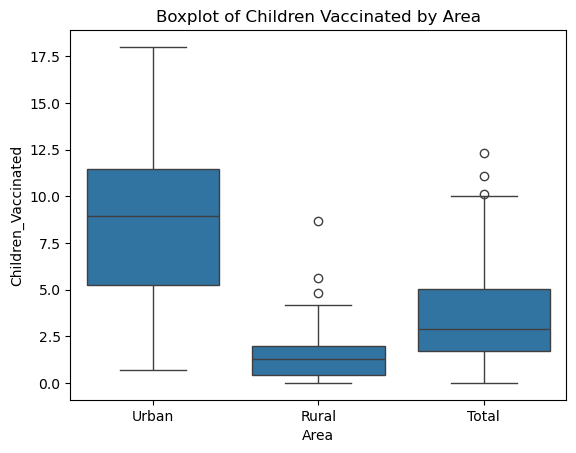

In [25]:
vaccinated = clean_data[['States/UTs', 'Area', 'Children_Vaccinated']]

grouped_area_vaccinated= vaccinated.groupby('Area')['Children_Vaccinated'].mean().reset_index()
sns.boxplot(x='Area', y='Children_Vaccinated', data= vaccinated)
plt.title('Boxplot of Children Vaccinated by Area')
plt.show()

There is critical disparity in children's vaccination coverage, with urban areas having a median rate over six times higher than rural areas (9% vs. 1.5%). This points to systemic issues in healthcare access, infrastructure, and delivery in rural settings. In rural area, there are several small circles above the rural maximum, indicating a few rural areas have achieved vaccination rates between ≈4.5% and ≈9%. These successful outlier rural regions could be valuable case studies for policy makers. In total, there are a few high outliers, which mainly originate from the successful high-rate urban areas.

Q.7 Analyze the children vaccination levels in each states/UTs, segmented by the Rural and Urban Data.

In [26]:
pivoted_vac = vaccinated.pivot_table(index='States/UTs', columns='Area', values='Children_Vaccinated')
filled_pivoted= pivoted_vac.fillna(0) #some states/UTs are having no data on their children vaccination levels
final_df = filled_pivoted.melt(ignore_index=False).reset_index()
final_df = final_df[final_df['States/UTs'] != 'India']

In [27]:
india_rur = clean_data[(clean_data['States/UTs'] == 'India') & (clean_data['Area'] == 'Rural')]['Children_Vaccinated'].iloc[0]
india_urb = clean_data[(clean_data['States/UTs'] == 'India') & (clean_data['Area'] == 'Urban')]['Children_Vaccinated'].iloc[0]

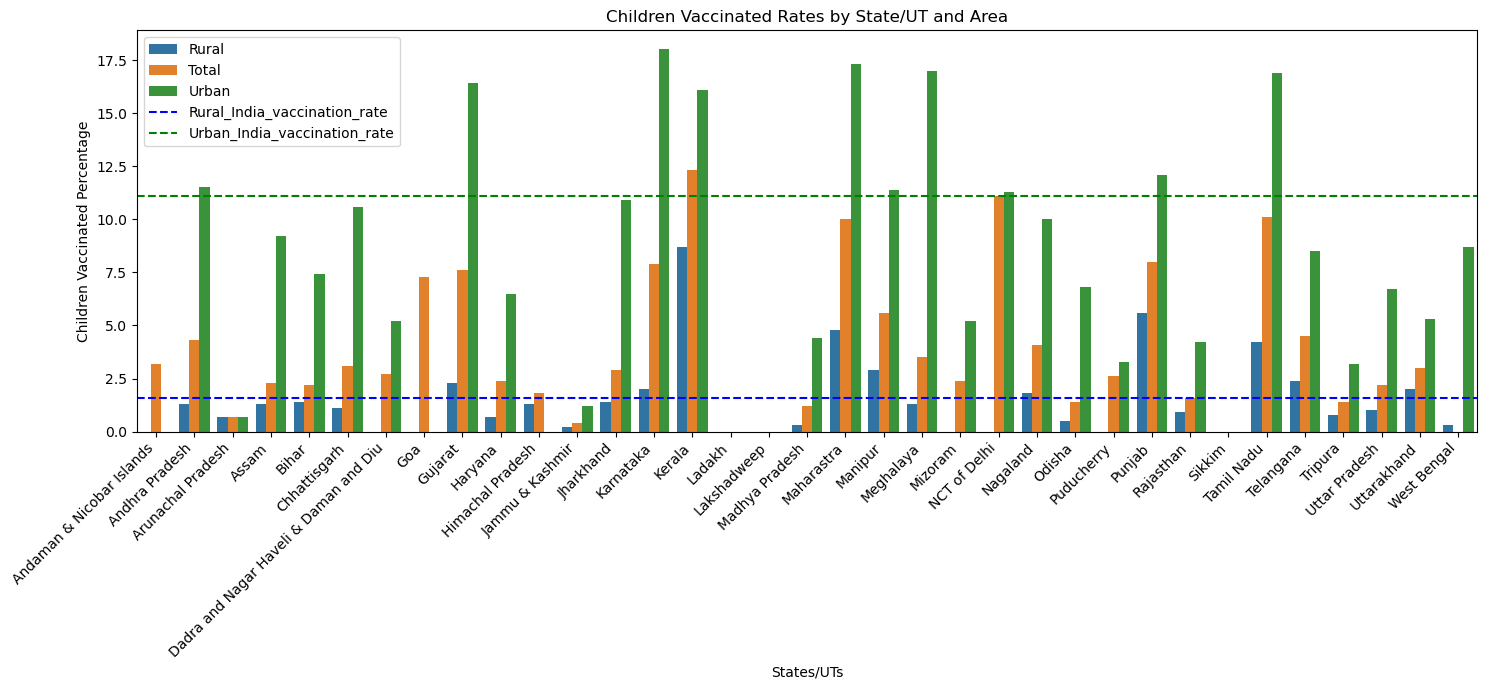

In [28]:
plt.figure(figsize=(15,7))
sns.barplot(x='States/UTs', y= 'value', hue= 'Area', data= final_df)
plt.title('Children Vaccinated Rates by State/UT and Area')
plt.xlabel('States/UTs')
plt.ylabel('Children Vaccinated Percentage')
plt.xticks(rotation=45, ha='right') 
plt.axhline(y= india_rur, label= 'Rural_India_vaccination_rate', linestyle = '--', color= 'blue')
plt.axhline(y= india_urb, label= 'Urban_India_vaccination_rate', linestyle = '--', color= 'green')
plt.tight_layout()
plt.legend()
plt.show()

We find that some states are missing in their data with regards to children vaccination. As shown also in Boxplot, Urban region is driving the overall chidlren vaccination. Interestingly in Arunachal Pradesh there is more or less equitable coverage children vaccination in both the areas, however very low overall. Clearly as seen above that chidlren vaccination is not mostly realted to underweight or anaemia and hence we do see states with high children anaemia levels but either low or high vaccination levels.  

In [29]:
clean_data.head()

,States/UTs,Area,Sex Ratio,Women_Alcohol_C,Men_Alcohol_C,Women_BA,Women_Phones,Women_worked,Women_Anaemic,Men_Anaemic,Children_Anaemic,Children_Underweight,Children_Vaccinated,Avg_OPE_Delivery,Infant_Mortality_Rate,Women_internet,Men_Internet,TFR,Pop_Electricity,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel
0,India,Urban,985.0,0.6,16.5,80.9,69.4,25.0,53.8,20.4,64.2,27.3,11.1,3385.0,26.6,51.8,72.5,1.6,99.1,98.7,81.5,89.7
1,India,Rural,1037.0,1.6,19.9,77.4,46.6,25.6,58.5,27.4,68.3,33.8,1.6,2770.0,38.4,24.6,48.7,2.1,95.7,94.6,64.9,43.2
2,India,Total,1020.0,1.3,18.8,78.6,54.0,25.4,57.0,25.0,67.1,32.1,4.2,2916.0,35.2,33.3,57.1,2.0,96.8,95.9,70.2,58.6
4,Andaman & Nicobar Islands,Rural,929.0,7.6,41.9,89.8,80.9,17.1,57.6,20.4,33.3,31.1,0.0,2089.0,8.4,27.9,41.1,1.2,96.5,95.3,88.0,71.0
5,Andaman & Nicobar Islands,Total,963.0,5.0,39.1,89.2,80.8,24.6,57.5,16.1,40.0,23.7,3.2,2924.0,20.6,34.8,46.5,1.3,97.6,96.3,88.0,79.8


Q.8  How Women or Men Internet access is influenced by Infant Mortality Ratio in each State/UTs?

In [30]:
internet = clean_data.iloc[:, 14:17]
cols_by_name = clean_data.columns.str.contains('States/UTs') | clean_data.columns.str.contains('Area')
selected_cols = clean_data.loc[:, cols_by_name]

df_internet = pd.concat([selected_cols, internet], axis=1)

df_internet.head()

,States/UTs,Area,Infant_Mortality_Rate,Women_internet,Men_Internet
0,India,Urban,26.6,51.8,72.5
1,India,Rural,38.4,24.6,48.7
2,India,Total,35.2,33.3,57.1
4,Andaman & Nicobar Islands,Rural,8.4,27.9,41.1
5,Andaman & Nicobar Islands,Total,20.6,34.8,46.5


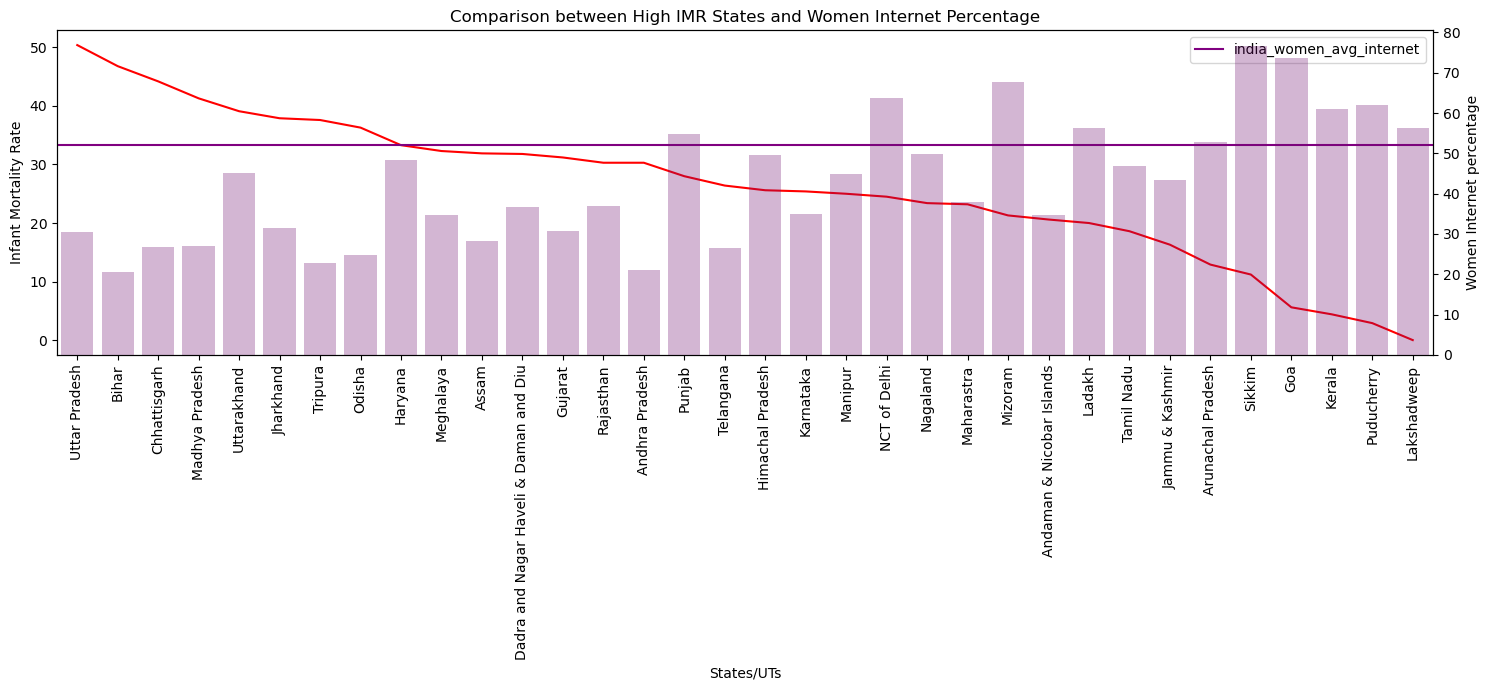

In [31]:
high_IMR= df_internet.sort_values('Infant_Mortality_Rate', ascending = False) #Sorting the dataframe in Decreasing high IMR states/UTs
high_IMR = high_IMR[high_IMR['States/UTs'] != 'India']

india_women_internet = clean_data[(clean_data['States/UTs'] == 'India') & (clean_data['Area'] == 'Total')]['Women_internet'].iloc[0]
Total_Areas = high_IMR[high_IMR['Area'] == 'Total'] #Calculating only the total 
states_list = Total_Areas['States/UTs'].unique().tolist()
fig, ax = plt.subplots(figsize= (15,7))
ax2 = ax.twinx()
sns.lineplot(x= 'States/UTs', y= 'Infant_Mortality_Rate', ax= ax, data= Total_Areas, color= 'red')
sns.barplot(x= 'States/UTs', y= 'Women_internet', data = Total_Areas, ax = ax2, color= 'purple', alpha= 0.3)
ax.set_title('Comparison between High IMR States and Women Internet Percentage')
ax.set_ylabel('Infant Mortality Rate')
ax2.set_ylabel('Women Internet percentage')
ax.set_xticks(range(len(states_list)))
ax.set_xticklabels(states_list, rotation = 90)
ax.axhline(y= india_women_internet, label= 'india_women_avg_internet', linestyle = '-', color= 'purple')
ax.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

There is a strong and consistent inverse correlation between IMR and Women Internet Percentage across the states. Women's access to the internet appears to be a strong proxy for overall socioeconomic development, digital literacy, and access to information regarding maternal and child health. Better-informed mothers and better-connected communities are highly associated with lower infant mortality. Kerala and Lakshadweep have near-zero IMR, corresponding with women's internet usage close to or above 60%. This suggests a near-complete public health system combined with high digital literacy. Notice that all states with an IMR above the national average (the left half of the chart) also have a Women Internet Percentage below the national average line (the purple horizontal line).

Q.9 Understanding the internet Gender Gap in each states/UTs segmented by the Rural and Urban Area.

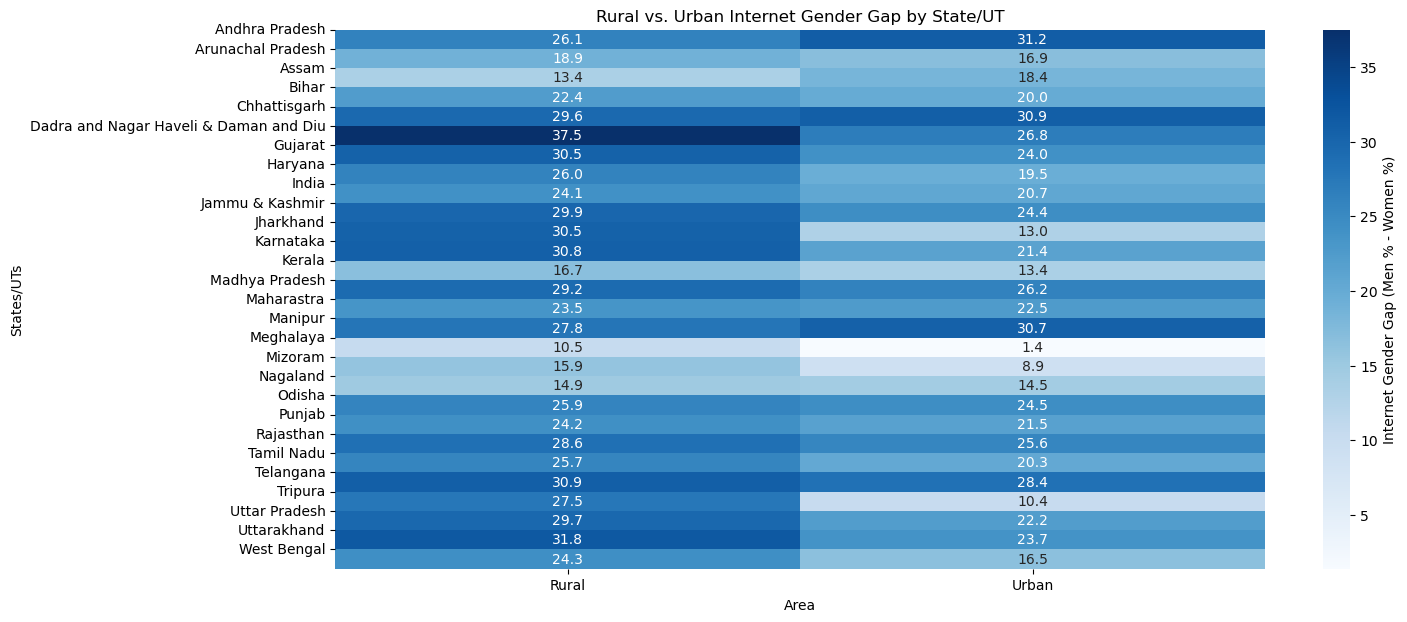

In [32]:
rural_and_urban = df_internet[df_internet['Area'] != 'Total'].copy()  #Excluding the total area 
rural_and_urban['internet_gap'] = rural_and_urban['Men_Internet'] - rural_and_urban['Women_internet']
pivoted_internet= rural_and_urban.pivot_table(index= 'States/UTs', columns= 'Area', values= 'internet_gap')
pivoted_internet = pivoted_internet.dropna(axis=0, how='any') 

plt.figure(figsize=(15,7))
sns.heatmap(
    pivoted_internet, 
    cmap='Blues',
    annot=True,  
    fmt=".1f",
    cbar_kws={'orientation':'vertical', 'label': 'Internet Gender Gap (Men % - Women %)'}
)
plt.title('Rural vs. Urban Internet Gender Gap by State/UT')
plt.ylabel('States/UTs')
plt.xlabel('Area')
plt.yticks(
    ticks=range(len(pivoted_internet.index)), 
    labels=pivoted_internet.index.tolist(),
    rotation=0
)
plt.show()

There is clear difference between internet gender gap in rural and urban areas. Like Dadar and Nagar Haveli & Daman and Diu have very high gender gap as much as 37.5% in rural areas but 26.8% in urban areas. However some states are uniform in their gap distribution like Telangana(30.9 % in Rural Vs. 28.4% in Urban). Meghalaya emerged out as a state with less gender gap overall in internet access though high in rural areas. States with high underweight levels(as shown above) has high high internet gender gap like in the case of Gujarat.

Q.10 How the development features are helpful in categorizing the state based on their scores in improved water source, sanitation and clean fuel in households?

In [33]:
pop_features = clean_data.iloc[:, 19:]
df_pop = pd.concat([selected_cols, pop_features], axis=1)
df_pop

,States/UTs,Area,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel
0,India,Urban,98.7,81.5,89.7
1,India,Rural,94.6,64.9,43.2
2,India,Total,95.9,70.2,58.6
4,Andaman & Nicobar Islands,Rural,95.3,88.0,71.0
5,Andaman & Nicobar Islands,Total,96.3,88.0,79.8
...,...,...,...,...,...
105,Uttarakhand,Urban,99.6,81.0,92.9
106,Uttarakhand,Rural,94.2,77.7,42.9
107,Uttarakhand,Total,95.9,78.8,59.2
108,West Bengal,Urban,98.6,75.0,80.3


In [34]:
from scipy.stats import zscore

df_pop_total = df_pop[df_pop['Area'] == 'Total'].copy()
df_pop_total = df_pop_total.reset_index(drop=True)
df_states = df_pop_total[['States/UTs']]
columns = ['Pop_improved_water_source', 'Pop_sanitation', 'Households_clean_fuel']
normalized_pop = df_pop_total[columns].apply(zscore) #calculating the zscore of the all these columns, useful to normalize the scale



In [35]:
normalized_pop.head()

,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel
0,0.385013,-0.476629,-0.259853
1,0.459360,0.950281,0.799547
2,0.533708,0.092532,0.989439
3,-0.023897,0.541447,-0.529700
4,-1.455084,-0.604891,-1.084385


In [36]:
df_pop_total['Development_score'] = normalized_pop.sum(axis=1) #Total development score across the column for each state
n_top = 10 
df_sorted = df_pop_total.sort_values(by='Development_score', ascending=False) #Sorting the dataframe based on the score
n_bottom = 10

top_performers = df_sorted.head(n_top)
bottom_performers = df_sorted.tail(n_bottom)

avg_top_score = top_performers['Development_score'].mean()
avg_bottom_score = bottom_performers['Development_score'].mean()

gap = avg_top_score - avg_bottom_score


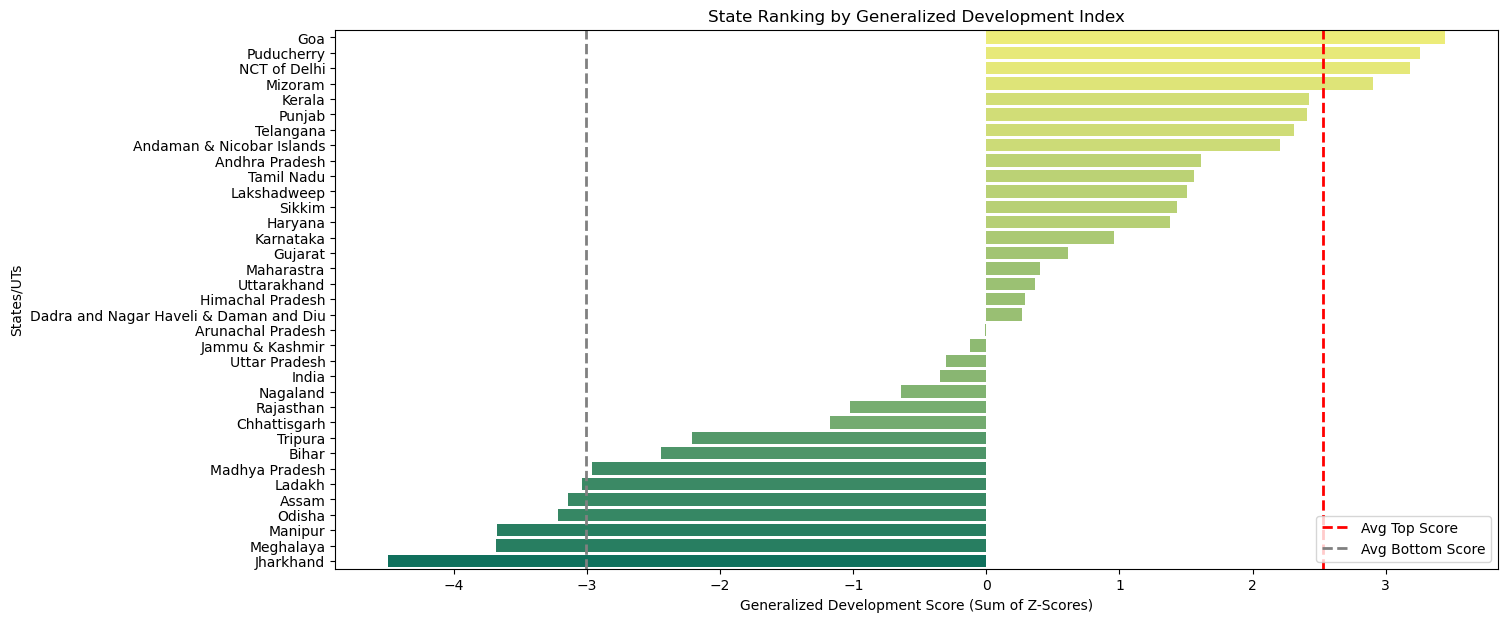

In [37]:
plt.figure(figsize= (15,7))
sns.barplot(x= 'Development_score', y= 'States/UTs', data= df_sorted, hue= 'Development_score', legend= False, palette= 'summer')
plt.axvline(x=avg_top_score, label='Avg Top Score', color='red', ls='--', linewidth=2)
plt.axvline(x=avg_bottom_score, label='Avg Bottom Score', color='grey', ls='--', linewidth=2)

plt.title('State Ranking by Generalized Development Index')
plt.xlabel('Generalized Development Score (Sum of Z-Scores)')
plt.ylabel('States/UTs')
plt.legend(loc='lower right')
plt.show()

Jharkhand is a critical outlier, with a score approaching −4.5, suggesting extreme deficits in all three components (water, sanitation, and clean fuel) compared to the national average. The top-performing group is dominated by smaller states, UTs, and historically better-developed coastal or metropolitan regions (Goa, Puducherry, Delhi, Kerala, Punjab). This suggests that size, concentrated population, and higher per-capita state spending facilitate the provision of basic infrastructure. The bottom performers are largely concentrated in Central India and the North-Eastern region (Jharkhand, Meghalaya, Manipur, Assam, Odisha, Bihar, Madhya Pradesh), although Ladakh is an outlier in this segment. These regions face the steepest challenge in closing the development gap across all three indicators. We also see Ladakh has worsen situation in regards to children anaemic levels. Thus more intervention is needed in its socio-economic development.


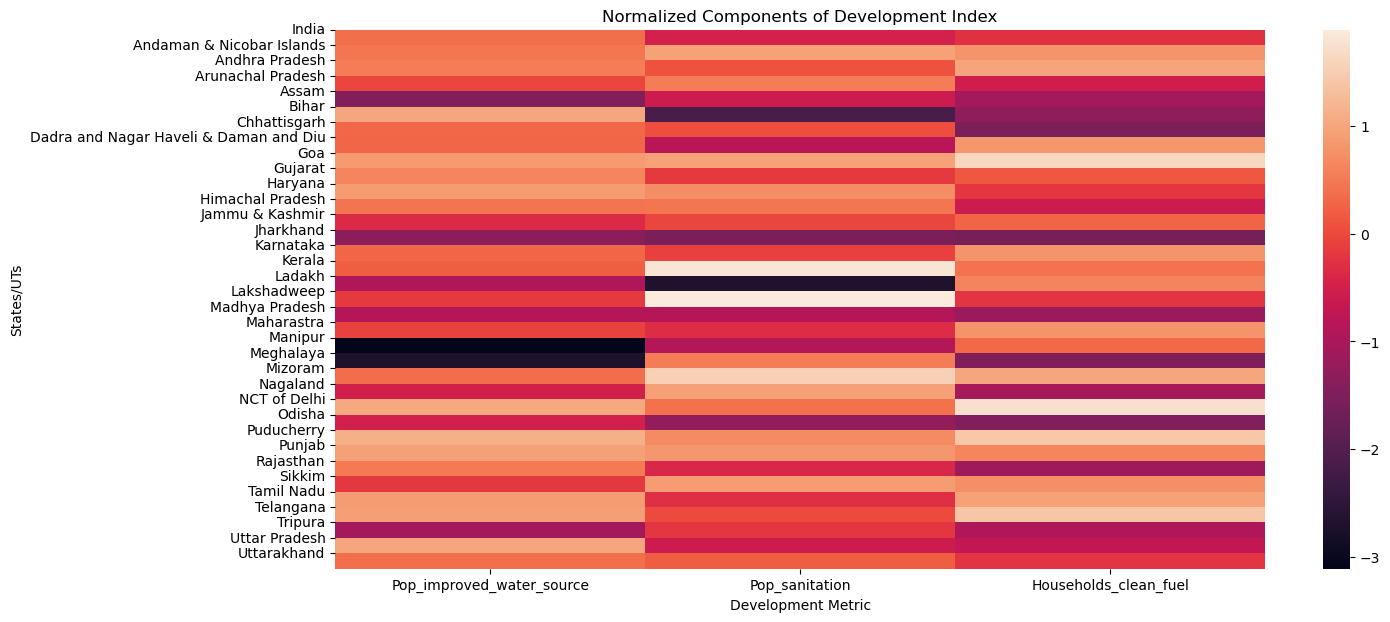

In [38]:
normalized_df= pd.concat([df_states, normalized_pop], axis=1)
indexed_normalized_df= normalized_df.set_index('States/UTs')

plt.figure(figsize=(15,7))
sns.heatmap(data= indexed_normalized_df)
plt.title('Normalized Components of Development Index')
plt.xlabel('Development Metric')
plt.yticks(
    ticks=range(len(indexed_normalized_df.index)), 
    labels=indexed_normalized_df.index.tolist(),
    rotation=0
)

plt.show()

We find that Ladakh's low score in development is largely lead by low population sanitation. Manipur and Meghalaya has also less improved water source as compared to other factors.  Most of the states/UTs are falling low on clean-fuel access. Kerala and Lakshadweep stands out good in sanitation of their population but Lakshadweep falls on other parameters. 

Q.11 Examine the correlation between Infant Moratlity Rate and development score in each States/UTs.

In [39]:
imr_data_to_merge = clean_data[clean_data['Area'] == 'Total'][['States/UTs', 'Infant_Mortality_Rate']]
df_pop_total = df_pop_total.merge(imr_data_to_merge, on='States/UTs', how='left')       # Keep all rows from df_pop_total
df_pop_total.head()

,States/UTs,Area,Pop_improved_water_source,Pop_sanitation,Households_clean_fuel,Development_score,Infant_Mortality_Rate
0,India,Total,95.9,70.2,58.6,-0.351469,35.2
1,Andaman & Nicobar Islands,Total,96.3,88.0,79.8,2.209188,20.6
2,Andhra Pradesh,Total,96.7,77.3,83.6,1.615678,30.3
3,Arunachal Pradesh,Total,93.7,82.9,53.2,-0.012150,12.9
4,Assam,Total,86.0,68.6,42.1,-3.144359,31.9


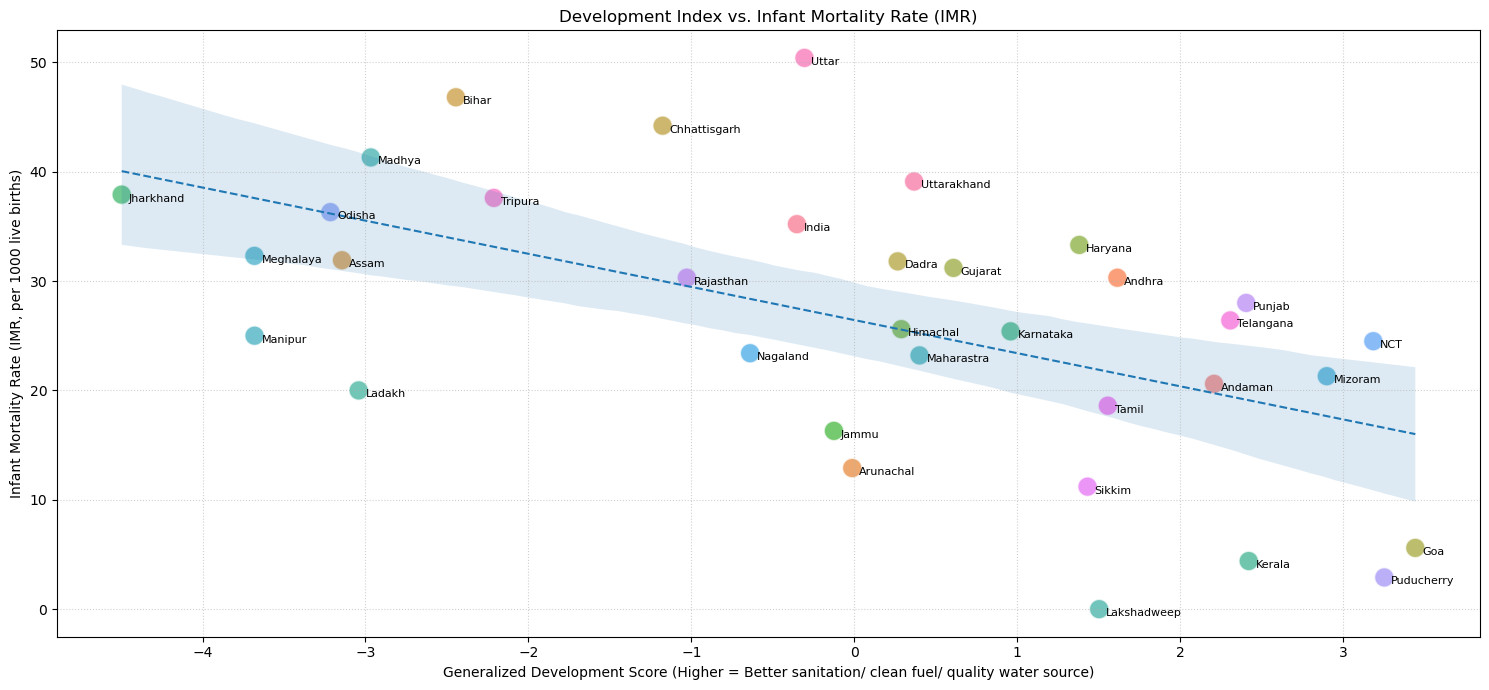

In [47]:
plt.figure(figsize=(15, 7))
sns.scatterplot( x='Development_score', y='Infant_Mortality_Rate', data=df_pop_total, hue='States/UTs',s= 200, alpha= 0.7, legend= False)
sns.regplot( x='Development_score', y='Infant_Mortality_Rate', data=df_pop_total, scatter=False, line_kws={'linestyle': '--', 'linewidth': 1.5})

for i in range(len(df_pop_total)):
    state_label = df_pop_total['States/UTs'].iloc[i].split()[0]
    plt.annotate(
        state_label,
        (df_pop_total['Development_score'].iloc[i], df_pop_total['Infant_Mortality_Rate'].iloc[i]), #coordinates for annotating the name
        xytext=(5, -5),  
        textcoords='offset points',
        fontsize=8
    )
plt.title('Development Index vs. Infant Mortality Rate (IMR)') 
plt.xlabel('Generalized Development Score (Higher = Better sanitation/ clean fuel/ quality water source)') 
plt.ylabel('Infant Mortality Rate (IMR, per 1000 live births)') 
plt.grid(True, linestyle=':', alpha=0.6) 
plt.tight_layout() 
plt.show()

We find there is roughly negative correlation IMR and development score. States with higher Development score(in the top score range) are generally being distance from the regression line. NCT, Punjab and Telangana are having high infant mortality rate even though they have a good development score. Uttarakhand and Gujarat despite being low moderately low on development score have high IMRs suggesting possible outlier and other factors. The strong negative trend confirms that policies like the Swachh Bharat Mission (sanitation) and Ujjwala Yojana (clean fuel) are essential health interventions. Improving these three infrastructure elements will likely lead to a direct reduction in IMR.  

Thank You!